# Project 1 : Investigate a Dataset - [No-show appointments]

# Introduction

### Dataset Description
The No-show appointments data downloaded from Kaggle. The dataset contains information on over 100,000 medical appointments in Brazil. Each row has the underlisted columns recorded observations for each patient. 

PatientID:       Unique identification for every patient in the dataset. 
AppointmentID:   Unique identification for each appointment in the dataset.
Gender:          Female(F) or Male(M).          
ScheduledDay:    The day the appointment was made.       
AppointmentDay:  The day the patient is supposed to go to the hospital.    
Age:             The age(Years) of the patients.                
Neighbourhood:   Where the patient is supposed to go for the appointment.      
Scholarship:     If the patient is enrolled in the Brasilian welfare program (1) or not (0). 
Hypertension:    Hypertensive Patient(1) or not(0).         
Diabetes:        Diabetic Patient(1) or not(0).           
Alcoholism:      Patient who is an alcoholic(1) or not(0).          
Handicap:        Patient who has a disability(1) or not(0).             
SMS_received     Did the patient receive a SMS(1) or not(0). 
No_show          Did the patient show up for the appointment(0) or not(1)*  

*The original encoding for the No-show column was reversed during the analysis.

Data Source: https://www.kaggle.com/datasets/joniarroba/noshowappointments

### Questions for Analysis

1. How many people showed up for their appointment?
2. What is the distribution of ages of people who show up or not for their appointments?
3. Is one gender likely to show up over the other?
4. If a person shows up for their appointment, which of the conditions is most likely present?
5. Wait times and No-show, any correlation?
6. 10 Largest Neighbourhoods who show up for their appointment.

 

***Import of Packages***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling

***Loading of the dataset into the DataFrame***

In [2]:
df = pd.read_csv(r'C:\Users\iT-Taste\Downloads\noshowappointments-kagglev2-may-2016.csv')

***Looking at the first 5 entries in each DataFrame***

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


***Number of rows and columns in each DataFrame***

In [4]:
df.shape

(110527, 14)

***Column data types***

In [5]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

***General Information on the dataset***

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


***Count of Unique Values in the Neighbourhood Column***

In [7]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [8]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

***Incorrect values in some of the columns***

In [9]:
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'Handcap']
for col in cols:
    y = []
    if df[col].nunique() > 2:
        y.append(col)

print(y)

['Handcap']


In [10]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

***Number of duplicated records***

In [11]:
df.duplicated().sum()

0

***Checking the Age column for possible wrong entries***

In [12]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [13]:
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


# Data Cleaning

***Cleaning Tasks***
1. PatientID,AppointmentID column types to string
2. Change column name 'Hipertension' to 'Hypertension'
3. ScheduledDay,AppointmentDay to datetime objects
4. Drop rows that have 3 or 4 as HandCap Values
5. Drop rows with age < 1

***Rename column names that is spelled incorrectly***

In [14]:
df.rename(columns={'Hipertension': 'Hypertension','PatientId': 'PatientID', 'Handcap': 'Handicap', 'No-show': 'No_show'}, inplace=True)
#check that column names have been changed
df.columns

Index(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

***Change the Yes/No values of No-show column to 0/1***

In [15]:
df.replace({'No': 0, 'Yes':1}, inplace = True)

***Change PatientId, AppointmentID, ScheduledDay & AppointmentDay column types to string and datetime appropriately***

In [16]:
df = df.astype({'PatientID': str, 'AppointmentID':str,'ScheduledDay': 'datetime64', 'AppointmentDay':'datetime64'})
#check that column type is now correct
df.dtypes

PatientID                 object
AppointmentID             object
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No_show                    int64
dtype: object

***Dropping entries with 3 or 4 as values in the HandiCap in the dataset***

In [17]:
df.drop(df[df.Handicap > 2].index, inplace =True)
#check that rows have been dropped
df.query('Handicap > 2')

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


***Dropping entries with incorrect age values***

In [18]:
df.drop(df[df.Age < 0].index, inplace =True)
#check that rows have been dropped
df.query('Age < 0')

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


# Exploratory Data Analysis 

***Research Question 1: How many people showed up for their appointment?***

In [19]:
percent_show = (len(df[df['No_show'] == 1]) /len(df)) * 100
print(f' {int(percent_show)}% of people generally showed up for their appointment.')

 20% of people generally showed up for their appointment.


**Correlation Factors between the Variables**

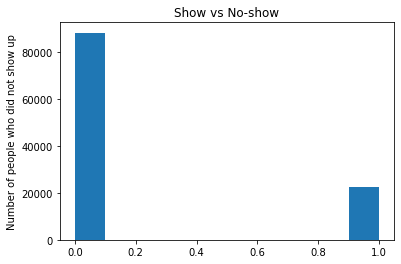

In [20]:
df['No_show'].hist(grid = False) ;
plt.ylabel('Number of people who did not show up')
plt.title('Show vs No-show');

In [21]:
df.corr()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
Age,1.000000,-0.092463,0.504632,0.292431,0.095642,0.079904,0.012702,-0.060282
Scholarship,-0.092463,1.000000,-0.019747,-0.024908,0.035081,-0.007876,0.001185,0.029142
Hypertension,0.504632,-0.019747,1.000000,0.433089,0.088081,0.083462,-0.006266,-0.035744
Diabetes,0.292431,-0.024908,0.433089,1.000000,0.018518,0.060038,-0.014559,-0.015178
Alcoholism,0.095642,0.035081,0.088081,0.018518,1.000000,0.002302,-0.026057,-0.000114
Handicap,0.079904,-0.007876,0.083462,0.060038,0.002302,1.000000,-0.024462,-0.006642
SMS_received,0.012702,0.001185,-0.006266,-0.014559,-0.026057,-0.024462,1.000000,0.126401
No_show,-0.060282,0.029142,-0.035744,-0.015178,-0.000114,-0.006642,0.126401,1.000000


***Research Question 2: What is the distribution of ages of people who show up or not for their appointments?***

In [22]:
df_show = df[df['No_show'] == 1]
df_show['Age'].describe()

count    22315.000000
mean        34.319023
std         21.964341
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

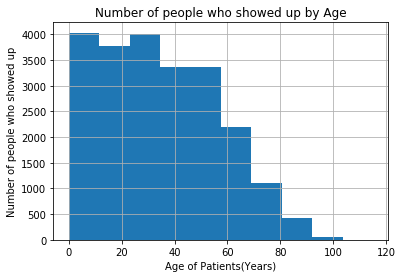

In [23]:
df_show['Age'].hist();
plt.ylabel('Number of people who showed up')
plt.xlabel('Age of Patients(Years)')
plt.title('Number of people who showed up by Age');

In [24]:
df_noshow = df[df['No_show'] == 0]
df_noshow['Age'].describe()

count    88195.000000
mean        37.789206
std         23.338264
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

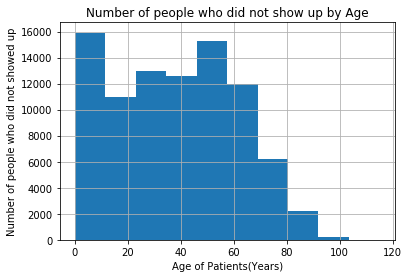

In [25]:
df_noshow['Age'].hist();
plt.ylabel('Number of people who did not showed up')
plt.xlabel('Age of Patients(Years)')
plt.title('Number of people who did not show up by Age');

***Research Question 3: Is one gender likely to show up over the other?*** 

13% of females are more likely to show up for their appointments compared to 6% of males.


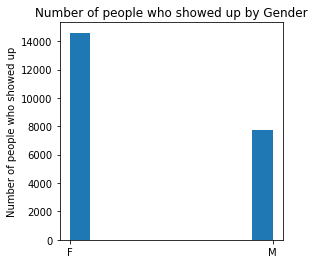

In [26]:
F = df.loc[df['Gender'] == 'F', 'No_show'].sum() 
M = df.loc[df['Gender'] == 'M', 'No_show'].sum()
f_show = (F/110526)*100            #proportion of females who showed up
m_show = (M/110526)*100            #proportion of males who showed up
print(f'{int(f_show)}% of females are more likely to show up for their appointments compared to {int(m_show)}% of males.')
df_show['Gender'].hist(figsize= (4,4), grid = False);
plt.ylabel('Number of people who showed up')
plt.title('Number of people who showed up by Gender');

***Research Question 4: If a person shows up for their appointment, which of the conditions is most likely present?***

***Stacked bar chart showing the proportions of Show/No-show for each variable***

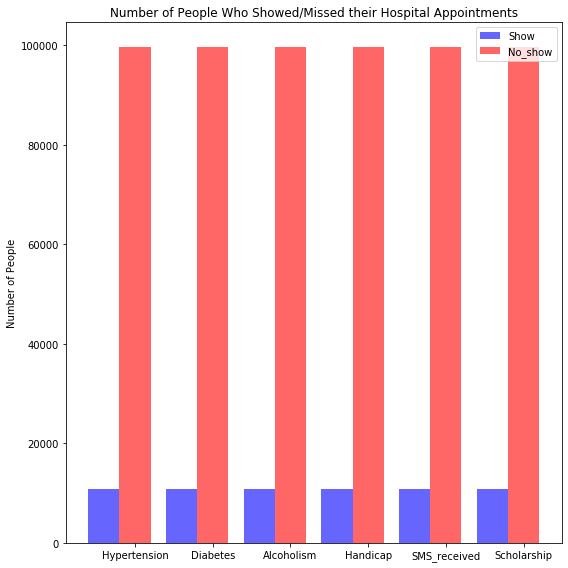

In [27]:
labels = ['Hypertension', 'Diabetes','Alcoholism','Handicap','SMS_received','Scholarship']

for v in labels:
    show_values = []
    noshow_values = []
    m = df.loc[df[v] == 1, 'No_show'].count() 
    n = df.loc[df[v] == 0, 'No_show'].count()
    show_values.append(m)
    noshow_values.append(n)


fig,ax = plt.subplots(figsize= (8,8))

width = 0.40

index = np.arange(len(labels))

rects1 = plt.bar(index, show_values, width, alpha=0.6, color='b',label='Show')

rects2 = plt.bar(index + width, noshow_values, width, alpha=0.6, color='r',label= 'No_show')

plt.ylabel('Number of People')
plt.title('Number of People Who Showed/Missed their Hospital Appointments')
plt.xticks(index + width, labels)
plt.legend()

plt.tight_layout()
plt.show()

***Proportion of people who are likely to show up for their appointment depending on their illness***

In [28]:
for v in labels:
    m = df.loc[df[v] == 1, 'No_show'].count() 
    n = df.loc[df[v] == 0, 'No_show'].count()
    a = (100* m)/(m+n)
    print(f"{int(a)}% of people with {v} are more likely to show up for their appointment")

19% of people with Hypertension are more likely to show up for their appointment
7% of people with Diabetes are more likely to show up for their appointment
3% of people with Alcoholism are more likely to show up for their appointment
1% of people with Handicap are more likely to show up for their appointment
32% of people with SMS_received are more likely to show up for their appointment
9% of people with Scholarship are more likely to show up for their appointment


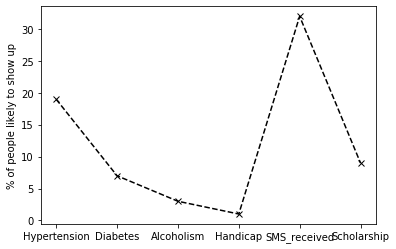

In [29]:
a = [19,7,3,1,32,9]
plt.plot(labels,a, 'k--x');
plt.ylabel('% of people likely to show up');

 ***Research Question 5: The average wait times for show/no-show appointments***

In [30]:
df['wait_time'] = df['AppointmentDay'] - df['ScheduledDay']

In [31]:
df['wait_time'].max()

Timedelta('178 days 13:19:01')

In [32]:
df_show = df[df['No_show'] == 1]
df_show['wait_time'].mean()

Timedelta('15 days 08:18:10.803092')

In [33]:
df_noshow = df[df['No_show'] == 0]
df_noshow['wait_time'].mean()

Timedelta('8 days 06:57:54.513351')

***Research Question 6: 10 Largest Neighbourhoods who show up for their appointment***

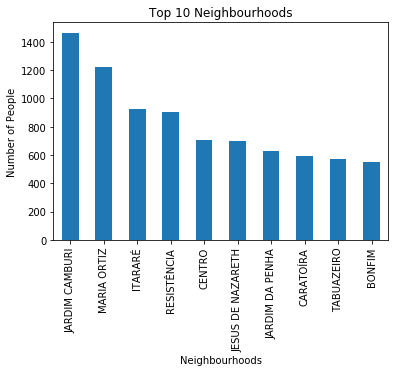

In [34]:
top10_show = df_show['Neighbourhood'].value_counts().head(10)
top10_show.plot(kind='bar')
plt.ylabel('Number of People')
plt.xlabel('Neighbourhoods')
plt.title('Top 10 Neighbourhoods');

# Conclusions

1. 20% of people surveyed made their appointment.
2. The Age distribution is the same for both people who showed or missed their appointment.
3. 13% of females showed up for their appointments compared to 6% of males.
4. 32% of people who received SMS showed up for their appointment.
5. 9% of people with Scholarship showed up for their appointment.
6. People who are hypertensive are more likely to show up in comparison to other illnesses.
7. Average wait time for people who show up for their appointment is 15 days and 8 days for the people who missed theirs.


### Limitations

1. Definite relationships between the different illnesses and show up rates could not be established because they were other variables.
2. The number of unique values in the Neighbourhood column is high compared to the total number of observations.